# **Taking Inputs**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import neighbors
from math import sqrt

from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

In [ ]:
housing = pd.read_csv('/content/drive/MyDrive/422/Project/train.csv')

housing.head(20)

,Id,LotArea,Street,Alley,Utilities,Neighborhood,BldgType,HouseStyle,YearBuilt,RoofStyle,Foundation,Electrical,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,SaleCondition,SalePrice
0,1,8450.0,Pave,NaN,AllPub,CollgCr,1Fam,2Story,2003.0,Gable,PConc,SBrkr,1710.0,2.0,3.0,1.0,0.0,2.0,Normal,208500
1,2,9600.0,Pave,NaN,AllPub,Veenker,1Fam,1Story,1976.0,Gable,CBlock,SBrkr,1262.0,2.0,3.0,1.0,1.0,2.0,Normal,181500
2,3,11250.0,Pave,NaN,AllPub,CollgCr,1Fam,2Story,2001.0,Gable,PConc,SBrkr,1786.0,2.0,3.0,1.0,1.0,2.0,Normal,223500
3,4,9550.0,Pave,NaN,AllPub,Crawfor,1Fam,2Story,1915.0,Gable,BrkTil,SBrkr,1717.0,1.0,3.0,1.0,1.0,3.0,Abnorml,140000
4,5,14260.0,Pave,NaN,AllPub,NoRidge,1Fam,2Story,2000.0,Gable,PConc,SBrkr,2198.0,2.0,4.0,1.0,1.0,3.0,Normal,250000
5,6,14115.0,Pave,NaN,AllPub,Mitchel,1Fam,1.5Fin,1993.0,Gable,Wood,SBrkr,1362.0,1.0,1.0,1.0,0.0,2.0,Normal,143000
6,7,10084.0,Pave,NaN,AllPub,Somerst,1Fam,1Story,2004.0,Gable,PConc,SBrkr,1694.0,2.0,3.0,1.0,1.0,2.0,Normal,307000
7,8,10382.0,Pave,NaN,AllPub,NWAmes,1Fam,2Story,1973.0,Gable,CBlock,SBrkr,2090.0,2.0,3.0,1.0,2.0,2.0,Normal,200000
8,9,6120.0,Pave,NaN,AllPub,OldTown,1Fam,1.5Fin,1931.0,Gable,BrkTil,FuseF,1774.0,2.0,2.0,2.0,2.0,2.0,Abnorml,129900
9,10,7420.0,Pave,NaN,AllPub,BrkSide,2fmCon,1.5Unf,1939.0,Gable,BrkTil,SBrkr,1077.0,1.0,2.0,2.0,2.0,1.0,Normal,118000


# **Dataset Analysis**

In [ ]:
housing.describe() #? COUNT SHOWS US ALL VALUES OUT OF 1022

,Id,LotArea,YearBuilt,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,SalePrice
count,1022.00000,1021.000000,1017.000000,1009.000000,1018.000000,1017.000000,1018.000000,1019.000000,1019.000000,1022.000000
mean,511.50000,10654.404505,1971.545723,1506.571853,1.565815,2.851524,1.048134,0.606477,1.758587,181713.254403
std,295.17029,11313.155791,30.057886,511.206642,0.550400,0.817248,0.227512,0.647799,0.743414,79854.663341
min,1.00000,1300.000000,1880.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,256.25000,7535.000000,1954.000000,1123.000000,1.000000,2.000000,1.000000,0.000000,1.000000,130000.000000
50%,511.50000,9450.000000,1974.000000,1456.000000,2.000000,3.000000,1.000000,1.000000,2.000000,163745.000000
75%,766.75000,11639.000000,2001.000000,1768.000000,2.000000,3.000000,1.000000,1.000000,2.000000,214975.000000
max,1022.00000,215245.000000,2010.000000,4676.000000,3.000000,8.000000,3.000000,3.000000,4.000000,755000.000000


In [ ]:
housing.shape

(1022, 20)

In [ ]:
(housing.isnull().sum())

Id                 0
LotArea            1
Street             0
Alley            957
Utilities         10
Neighborhood       5
BldgType           9
HouseStyle         4
YearBuilt          5
RoofStyle          3
Foundation         5
Electrical         9
GrLivArea         13
FullBath           4
BedroomAbvGr       5
KitchenAbvGr       4
Fireplaces         3
GarageCars         3
SaleCondition      0
SalePrice          0
dtype: int64

# **DATASET PRE PROCESSING**


## **Removing columns that have excessive null values and unnecessary data**


In [ ]:
housing.drop(['Alley'], axis=1, inplace=True)
housing.drop(['Id'], axis=1, inplace=True)

housing.shape

(1022, 18)

In [ ]:
(housing.isnull().sum())

LotArea           1
Street            0
Utilities        10
Neighborhood      5
BldgType          9
HouseStyle        4
YearBuilt         5
RoofStyle         3
Foundation        5
Electrical        9
GrLivArea        13
FullBath          4
BedroomAbvGr      5
KitchenAbvGr      4
Fireplaces        3
GarageCars        3
SaleCondition     0
SalePrice         0
dtype: int64

array([[<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'GrLivArea'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>],
       [<Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageCars'}>,
        <Axes: title={'center': 'SalePrice'}>]], dtype=object)

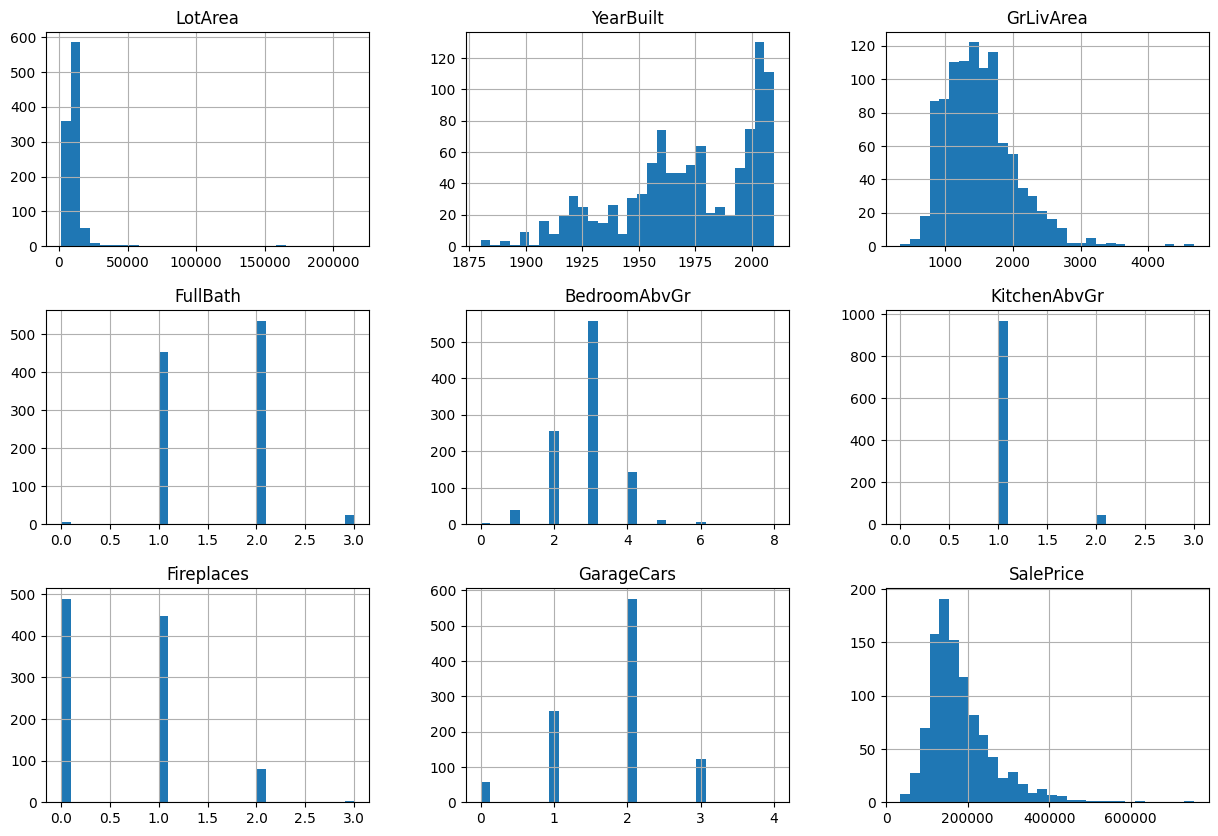

In [ ]:
%matplotlib inline

housing.hist(bins=30,figsize=(15,10))

## **Replaced integer columns with their median value**


In [ ]:
# Create the imputer object
imputer1 = SimpleImputer(missing_values=np.nan, strategy='median')
columns_to_impute = [0, 6, 10, 11, 12, 13, 14, 15]
df_to_impute = housing.iloc[:, columns_to_impute]
imputer1.fit(df_to_impute)
housing_imputed = pd.DataFrame(imputer1.transform(df_to_impute), columns=df_to_impute.columns)
housing.iloc[:, columns_to_impute] = housing_imputed


print(housing.isnull().sum())

LotArea           0
Street            0
Utilities        10
Neighborhood      5
BldgType          9
HouseStyle        4
YearBuilt         0
RoofStyle         3
Foundation        5
Electrical        9
GrLivArea         0
FullBath          0
BedroomAbvGr      0
KitchenAbvGr      0
Fireplaces        0
GarageCars        0
SaleCondition     0
SalePrice         0
dtype: int64


## **Replacing String Columns with most frequent valus, Checking Any Negative price exists or not**



In [ ]:
# Create the imputer object for categorical variables
imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

string_imputed = ['Utilities', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Foundation', 'Electrical', 'SaleCondition']

housing[string_imputed] = imputer2.fit_transform(housing[string_imputed])

print(housing.isnull().sum())

LotArea          0
Street           0
Utilities        0
Neighborhood     0
BldgType         0
HouseStyle       0
YearBuilt        0
RoofStyle        0
Foundation       0
Electrical       0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
GarageCars       0
SaleCondition    0
SalePrice        0
dtype: int64


In [ ]:
# Check if the 'SalePrice' column has negative values
sale_price_negative = (housing['SalePrice'] < 0).any()

if sale_price_negative:
    print("The SalePrice column has negative values.")
else:
    print("The SalePrice column does not have any negative values.")

The SalePrice column does not have any negative values.


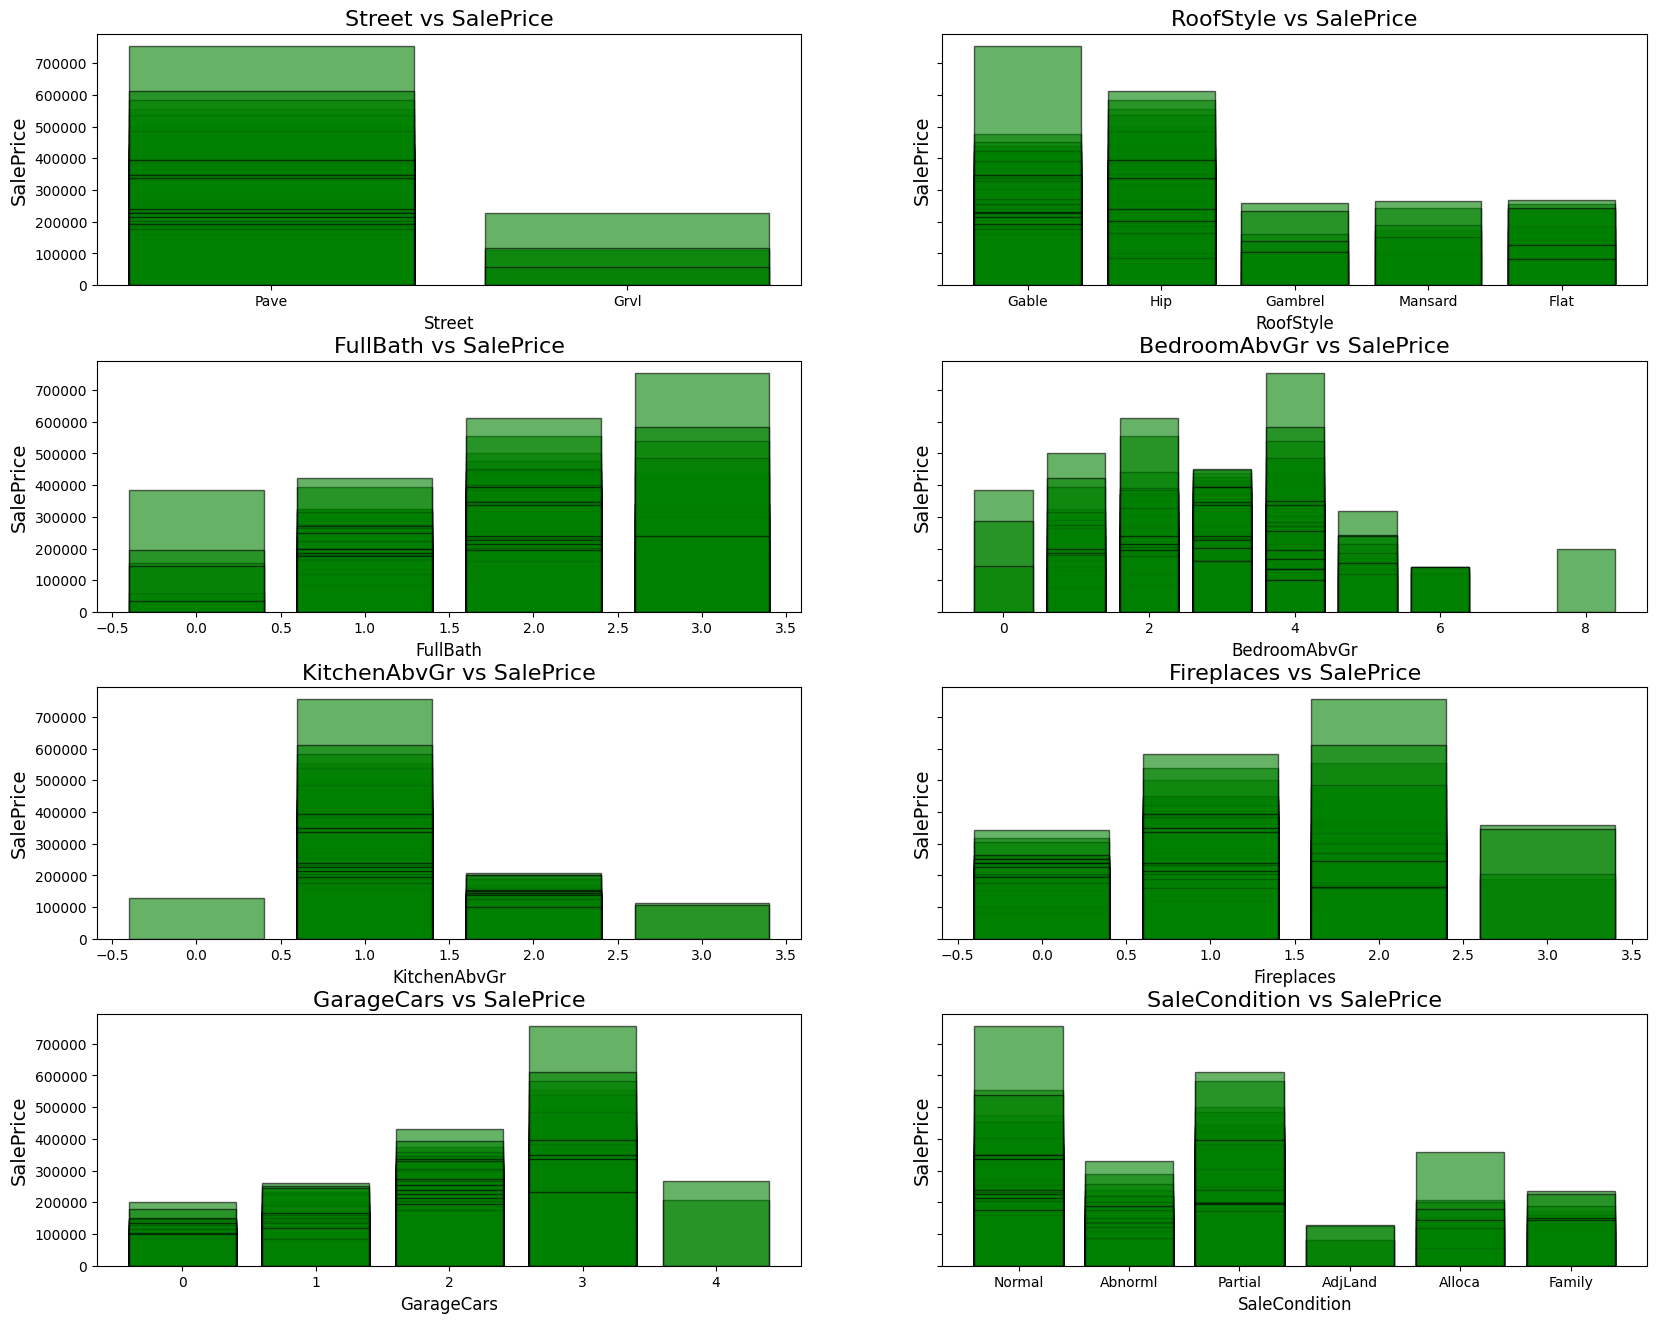

In [ ]:
columns_to_plot = [1, 7, 11, 12, 13, 14, 15, 16]
target = "SalePrice"
figure, axs = plt.subplots(len(columns_to_plot) // 2 + len(columns_to_plot) % 2, 2, figsize=(20, len(columns_to_plot) * 2), sharey=True, squeeze=True)

for i, column in enumerate(columns_to_plot):
    axs[i // 2, i % 2].bar(housing.iloc[:, column], housing[target], color='Green', edgecolor='black', linewidth=1, alpha=0.6)
    axs[i // 2, i % 2].set_xlabel(housing.columns[column], fontsize=12)
    axs[i // 2, i % 2].set_ylabel(target, fontsize=14)
    axs[i // 2, i % 2].set_title(f'{housing.columns[column]} vs {target}', fontsize=16)

figure.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

## **Pre Processed data**

In [ ]:
housing.info() #? FOCUS ON THE NON-NULL COUNT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1022 non-null   float64
 1   Street         1022 non-null   object 
 2   Utilities      1022 non-null   object 
 3   Neighborhood   1022 non-null   object 
 4   BldgType       1022 non-null   object 
 5   HouseStyle     1022 non-null   object 
 6   YearBuilt      1022 non-null   float64
 7   RoofStyle      1022 non-null   object 
 8   Foundation     1022 non-null   object 
 9   Electrical     1022 non-null   object 
 10  GrLivArea      1022 non-null   float64
 11  FullBath       1022 non-null   float64
 12  BedroomAbvGr   1022 non-null   float64
 13  KitchenAbvGr   1022 non-null   float64
 14  Fireplaces     1022 non-null   float64
 15  GarageCars     1022 non-null   float64
 16  SaleCondition  1022 non-null   object 
 17  SalePrice      1022 non-null   int64  
dtypes: float

In [ ]:
(housing.isnull().sum())

LotArea          0
Street           0
Utilities        0
Neighborhood     0
BldgType         0
HouseStyle       0
YearBuilt        0
RoofStyle        0
Foundation       0
Electrical       0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
GarageCars       0
SaleCondition    0
SalePrice        0
dtype: int64

In [ ]:
print(housing.dtypes) #? SEARCH OBJECT OR STRING

LotArea          float64
Street            object
Utilities         object
Neighborhood      object
BldgType          object
HouseStyle        object
YearBuilt        float64
RoofStyle         object
Foundation        object
Electrical        object
GrLivArea        float64
FullBath         float64
BedroomAbvGr     float64
KitchenAbvGr     float64
Fireplaces       float64
GarageCars       float64
SaleCondition     object
SalePrice          int64
dtype: object


In [ ]:
categorical_cols = ['Street', 'Utilities', 'Neighborhood', 'BldgType',
                    'HouseStyle', 'RoofStyle', 'Foundation', 'Electrical', 'SaleCondition']

housing_encoded = pd.get_dummies(housing, columns=categorical_cols, prefix=categorical_cols)


In [ ]:
general_dataset = housing_encoded

housing_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 73 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotArea                1022 non-null   float64
 1   YearBuilt              1022 non-null   float64
 2   GrLivArea              1022 non-null   float64
 3   FullBath               1022 non-null   float64
 4   BedroomAbvGr           1022 non-null   float64
 5   KitchenAbvGr           1022 non-null   float64
 6   Fireplaces             1022 non-null   float64
 7   GarageCars             1022 non-null   float64
 8   SalePrice              1022 non-null   int64  
 9   Street_Grvl            1022 non-null   bool   
 10  Street_Pave            1022 non-null   bool   
 11  Utilities_AllPub       1022 non-null   bool   
 12  Utilities_NoSeWa       1022 non-null   bool   
 13  Neighborhood_Blmngtn   1022 non-null   bool   
 14  Neighborhood_Blueste   1022 non-null   bool   
 15  Neig

## **Standardization of Data**

In [ ]:
# Create an instance of StandardScaler
scaler = StandardScaler()

batch_size = 200

# Partially fit the scaler to data in batches
for i in range(0, len(housing_encoded), batch_size):
    scaler.partial_fit(housing_encoded[i:i+batch_size])

# Transform the entire dataset using the fitted scaler
X_scaled = scaler.transform(housing_encoded)


## **Spliting & Checking Features corelation with the sale price**

In [ ]:
X = X_scaled
y = housing_encoded['SalePrice'].to_numpy()

In [ ]:
# Create DataFrames from X and y
X_dataframe = pd.DataFrame(X, columns=housing_encoded.columns)
y_dataframe = pd.DataFrame(housing_encoded['SalePrice'], columns=['SalePrice'])

# Concatenate X and y DataFrames, then compute correlation matrix
corr_matrix = pd.concat([X_dataframe, y_dataframe], axis=1).corr()

correlations = corr_matrix.iloc[-1, :-1]

print(correlations.abs().sort_values(ascending=False).head(10))


SalePrice                1.000000
GrLivArea                0.732569
GarageCars               0.657787
FullBath                 0.557077
YearBuilt                0.528288
Foundation_PConc         0.498623
Fireplaces               0.473374
Neighborhood_NridgHt     0.455455
SaleCondition_Partial    0.372461
Foundation_CBlock        0.347623
Name: SalePrice, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print(" ")

print("Total number of samples:", len(X_scaled))
print("Number of samples in the training set:", len(X_train))
print("Number of samples in the testing set:", len(X_test))
print("Sum of samples in train and test:", len(X_train) + len(X_test))

test_size_example = len(X_test) / len(X_scaled)
print("Test size proportion:", test_size_example)

print('''
Checking if train and test split is successful
''')

print("Difference:", np.abs(test_size_example - 0.3))

X_train shape: (715, 73)
X_test shape: (307, 73)
y_train shape: (715,)
y_test shape: (307,)
 
Total number of samples: 1022
Number of samples in the training set: 715
Number of samples in the testing set: 307
Sum of samples in train and test: 1022
Test size proportion: 0.30039138943248533

Checking if train and test split is successful

Difference: 0.0003913894324853451


In [ ]:
# Convert X_scaled array to DataFrame X
X = pd.DataFrame(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

if any(np.intersect1d(X_train.index, X_test.index)):
    print("The train and test data is mixed.")
else:
    print("The train and test data is not mixed.")


The train and test data is not mixed.


# MODELS Training & Testing

## **Linear Regression**

In [ ]:
linreg = LinearRegression().fit(X_train, y_train)

In [ ]:
# Calculate residuals
residuals = y_train - linreg.predict(X_train)

# Calculate outlier threshold
outlier_threshold = 3 * np.std(residuals)

# Detect outliers
outliers = np.abs(residuals) > outlier_threshold


In [ ]:
linreg_score = 0

if np.all(outliers):
    print("All samples are outliers, cannot fit a linear regression model")
else:
    # Create a cleaned dataset without outliers
    X_train_cleaned, y_train_cleaned = X_train[~outliers], y_train[~outliers]

    # Fit a linear regression model to the cleaned data
    linreg_cleaned = LinearRegression().fit(X_train_cleaned, y_train_cleaned)

    # Predict house prices on the test set using the cleaned model
    y_pred_cleaned = linreg_cleaned.predict(X_test)

    # Calculate evaluation metrics
    mse_cleaned = mean_squared_error(y_test, y_pred_cleaned)
    rmse_cleaned = np.sqrt(mse_cleaned)
    mae = mean_absolute_error(y_test, y_pred_cleaned)
    r2_score_cleaned = r2_score(y_test, y_pred_cleaned) * 100

    linreg_score = r2_score_cleaned

    print(f"Root Mean Squared Error: {rmse_cleaned:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(" ")
    print(f"R^2 Score: {r2_score_cleaned:.6f}%")


Root Mean Squared Error: 5430.84
Mean Absolute Error: 329.74
 
R^2 Score: 99.447009%


In [ ]:
train_accuracy = linreg_cleaned.score(X_train_cleaned, y_train_cleaned)

test_accuracy = linreg_cleaned.score(X_test, y_test)

print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Training accuracy: 1.0
Test accuracy: 0.99447009020177


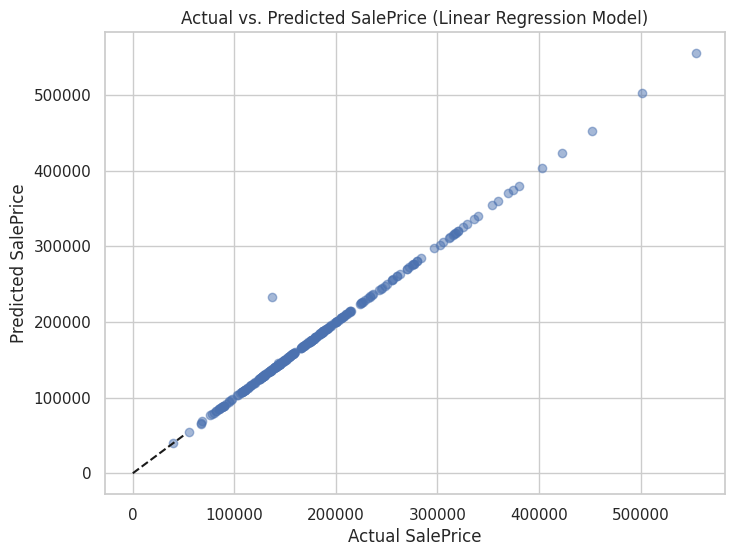

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred_cleaned, alpha=0.5)
plt.plot([0, 50000], [0, 50000], '--k')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice (Linear Regression Model)')
plt.grid(True)
plt.show()


## **K-Nearest Neighbors (KNN)**

In [ ]:
gX = housing_encoded.drop(['SalePrice'], axis=1)
y = housing_encoded['SalePrice']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Scaling the data
r_scaler = RobustScaler()
X_train_scaled = r_scaler.fit_transform(X_train)
X_test_scaled = r_scaler.transform(X_test)

# Convert back to DataFrames
x_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
x_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [ ]:
rmse_val = []
mse_val = []


for k in range(1, 20):
    # Create a KNN regression model with k neighbors
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Calculate RMSE and MSE
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)

    # Append RMSE and MSE to their respective lists
    rmse_val.append(rmse)
    mse_val.append(mse)

    print(f"Mean Squared Error (MSE) | Root Mean Squared Error (RMSE) for k = {k}:    {mse:.2f} | {rmse:.2f}")



Mean Squared Error (MSE) | Root Mean Squared Error (RMSE) for k = 1:    2077486099.18 | 45579.45
Mean Squared Error (MSE) | Root Mean Squared Error (RMSE) for k = 2:    1886701625.74 | 43436.18
Mean Squared Error (MSE) | Root Mean Squared Error (RMSE) for k = 3:    1669519726.60 | 40859.76
Mean Squared Error (MSE) | Root Mean Squared Error (RMSE) for k = 4:    1570887719.19 | 39634.43
Mean Squared Error (MSE) | Root Mean Squared Error (RMSE) for k = 5:    1654706457.29 | 40678.08
Mean Squared Error (MSE) | Root Mean Squared Error (RMSE) for k = 6:    1643737449.44 | 40543.03
Mean Squared Error (MSE) | Root Mean Squared Error (RMSE) for k = 7:    1623805779.13 | 40296.47
Mean Squared Error (MSE) | Root Mean Squared Error (RMSE) for k = 8:    1639641949.06 | 40492.49
Mean Squared Error (MSE) | Root Mean Squared Error (RMSE) for k = 9:    1704938916.83 | 41290.91
Mean Squared Error (MSE) | Root Mean Squared Error (RMSE) for k = 10:    1721251452.91 | 41487.97
Mean Squared Error (MSE) | Ro

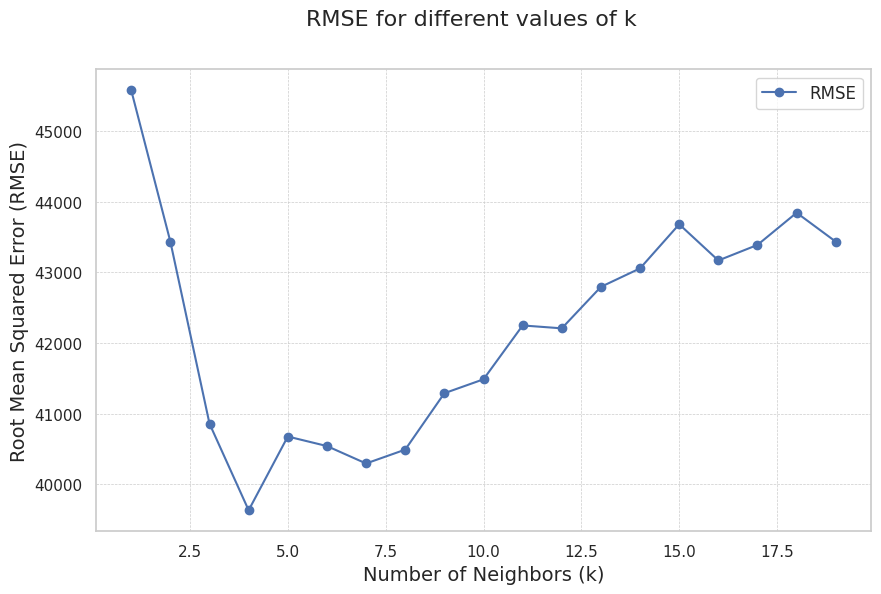

In [ ]:
# Create a figure and axis for the plot
fig, axs = plt.subplots(figsize=(10, 6))
fig.suptitle('RMSE for different values of k', fontsize=16)

# Plot RMSE values against k values
axs.plot(range(1, 20), rmse_val, marker='o', linestyle='-', color='b', label='RMSE')

# Add labels to the x-axis and y-axis
axs.set_xlabel('Number of Neighbors (k)', fontsize=14)
axs.set_ylabel('Root Mean Squared Error (RMSE)', fontsize=14)



axs.grid(True, which='both', linestyle='--', linewidth=0.5)
axs.legend(loc='best', fontsize=12)
plt.show()


In [ ]:
optimal_k_rmse = rmse_val.index(min(rmse_val)) + 1
print(f"The optimal value of k based on RMSE is {optimal_k_rmse}")

The optimal value of k based on RMSE is 4


In [ ]:
# Fit the model on the training data using the optimal value of k
k = optimal_k_rmse  # Use optimal_k_rmse found earlier
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(x_train, y_train)

# Predict house prices using the trained model
y_pred = knn_model.predict(x_test)

# Check for negative predicted values
neg_preds = [pred for pred in y_pred if pred < 0]

# If there are negative predictions, print them
if neg_preds:
    print("Negative predicted values:", neg_preds)
else:
    print("No negative predicted values")

# Calculate and print the minimum and maximum predicted values
min_pred = np.min(y_pred)
max_pred = np.max(y_pred)

print("Minimum predicted value:", min_pred)
print("Maximum predicted value:", max_pred)


No negative predicted values
Minimum predicted value: 74302.75
Maximum predicted value: 391907.75


In [ ]:
# Calculate evaluation metrics for KNN model's predictions
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE
test_mse = mean_squared_error(y_test, y_pred)  # MSE
test_r2 = r2_score(y_test, y_pred) * 100  # R^2 Score
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

# Assign scores for KNN model
knn_score = test_r2
knn_mae = mae

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print()
print(f"R^2 score: {test_r2:.2f}%")


Mean Squared Error (MSE): 1570887719.19
Root Mean Squared Error (RMSE): 39634.43
Mean Absolute Error (MAE): 26154.39

R^2 score: 70.55%


In [ ]:
train_r2 = knn_model.score(x_train, y_train)
test_r2 = knn_model.score(x_test, y_test)

print('Training R^2 score:', train_r2)
print('Test R^2 score:', test_r2)


Training R^2 score: 0.8426677163338688
Test R^2 score: 0.7054703552884454


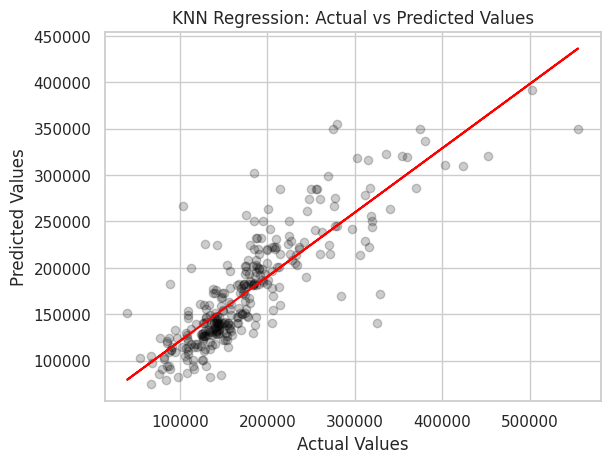

In [ ]:
plt.scatter(y_test, y_pred, color='black', alpha=0.2)

coefficients = np.polyfit(y_test, y_pred, 1)
polynomial = np.poly1d(coefficients)
plt.plot(y_test, polynomial(y_test), color='red')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression: Actual vs Predicted Values')
plt.show()


## **Support Vector Machine (SVM)**

In [ ]:
X = housing_encoded.iloc[:, 1:8].values
y = housing_encoded.iloc[:, 8].values

scaler = RobustScaler()

X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
# Creating a Support Vector Machine for Regression (SVR) model
svm_model = SVR(kernel='poly', C=1000000, coef0=0.1) #kernel = polynomial

# Fitting the SVR model to the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Making predictions on the scaled testing data
y_pred = svm_model.predict(X_test_scaled)

neg_preds = [pred for pred in y_pred if pred < 0]
if len(neg_preds) > 0:
    print("Negative predicted values:", neg_preds)
else:
    print("No negative predicted values")

# Calculating the minimum and maximum predicted values
min_pred = np.min(y_pred)
max_pred = np.max(y_pred)
print("Minimum predicted value:", min_pred)
print("Maximum predicted value:", max_pred)


No negative predicted values
Minimum predicted value: 39561.0606259943
Maximum predicted value: 534895.4499264046


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) * 100
svm_score = r2
svm_mae = mae


print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(" ")
print(f"R^2 score: {r2:.2f}%")


Mean Squared Error: 1266546408.70
Root Mean Squared Error: 35588.57
Mean Absolute Error: 24350.76
 
R^2 score: 76.25%


In [ ]:
train_accuracy = svm_model.score(X_train_scaled, y_train)
test_accuracy = svm_model.score(X_test_scaled, y_test)

print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Training accuracy: 0.8856908239738225
Test accuracy: 0.7625320643804319


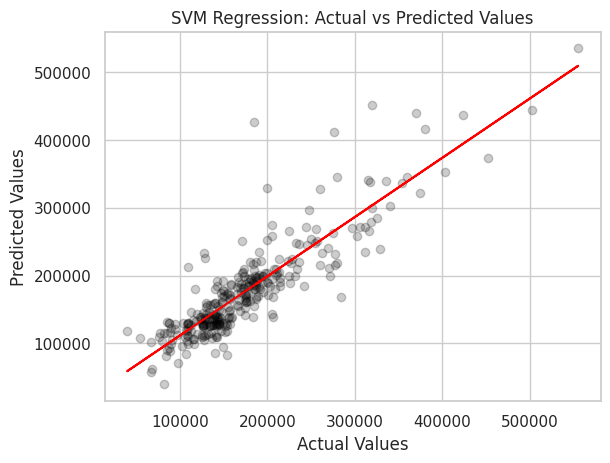

In [ ]:
plt.scatter(y_test, y_pred, color='black', alpha=0.2)

coefficients = np.polyfit(y_test, y_pred, 1)
polynomial = np.poly1d(coefficients)
plt.plot(y_test, polynomial(y_test), color='red')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM Regression: Actual vs Predicted Values')
plt.show()

# Output Analysis

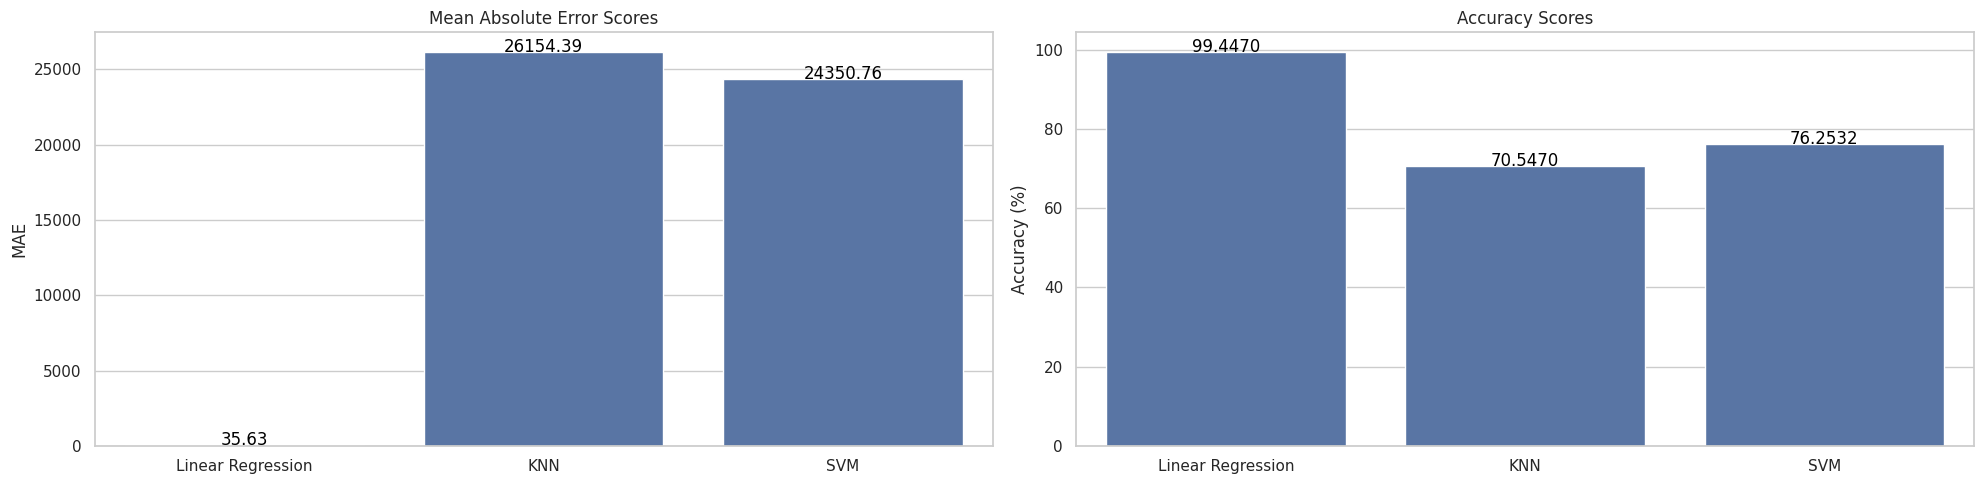

In [ ]:
models = ['Linear Regression', 'KNN', 'SVM']
mae_scores = [linreg_mae, knn_mae, svm_mae]
accuracy_scores = [linreg_score, knn_score, svm_score]

sns.set(style="whitegrid")

# Create a Seaborn bar chart with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x=models, y=mae_scores, ax=axs[0])
axs[0].set_title('Mean Absolute Error Scores')
axs[0].set_ylabel('MAE')

for i, v in enumerate(mae_scores):
    axs[0].text(i, v, f"{v:.2f}", color='black', ha="center")


sns.barplot(x=models, y=accuracy_scores, ax=axs[1])
axs[1].set_title('Accuracy Scores')
axs[1].set_ylabel('Accuracy (%)')

for i, v in enumerate(accuracy_scores):
    axs[1].text(i, v, f"{v:.4f}", color='black', ha="center")

fig.tight_layout()
plt.show()

In [ ]:
print(F'''The models prediction accuracy are as follows:

Linear Regression: {linreg_score:.4f}%
K-Nearest Neighbors: {knn_score:.4f}%
Support Machine Vector: {svm_score:.4f}%
''')

The models prediction accuracy are as follows:

Linear Regression: 99.4470%
K-Nearest Neighbors: 70.5470%
Support Machine Vector: 76.2532%

